# Import delle librerie

In [2]:
# Standard libraries
import os
import numpy as np
import random
from PIL import Image
from types import SimpleNamespace
from matplotlib_inline.backend_inline import set_matplotlib_formats

# Dataset
import pickle
from torch.utils.data import Dataset, DataLoader, random_split

# BaseLine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

# Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
set_matplotlib_formats('svg', 'pdf') # For export
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0
import seaborn as sns
sns.reset_orig()

# PyTorch
import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor

# Progress bar
from tqdm.notebook import tqdm

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Download dataset
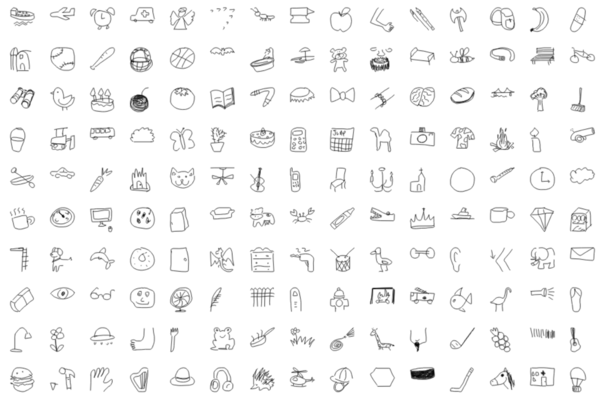 \
The Quick Draw Dataset è una collezione di 50 milioni di disegni suddivisi in 345 categorie. In questa implementazione ho scaricato 30 dataset
1 per categoria, i vari dataset sono composti da Numpy bitmaps ovvero delle versioni scalate a 28x28 pixel dei SDF. \
le categorie scelte sono:
1. camel
2. dog
3. duck
4. face
5. horse
6. ice cream
7. microphone
8. monkey
9. moon
10. mosquito
11. mountain
12. moustache
13. mug
14. onion
15. owl
16. panda
17. pillow
18. pizza
19. pond
20. pool
21. potato
22. radio
23. rainbow
24. sailboat
25. snowman
26. sun
27. television
28. The Eiffel Tower
29. toilet
30. train

In [3]:
# 1. Camel
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy

# 2. Dog
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy

# 3. Face
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/face.npy

# 4. Horse
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/horse.npy

# 5. Ice Cream
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ice%20cream.npy

# 6. Moon
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/moon.npy

# 7. Microphone
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/microphone.npy

# 8. Onion
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/onion.npy

# 9. Pillow
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pillow.npy

# 10. Potato
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/potato.npy

# 11. Pond
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pond.npy

# 12. Pool
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pool.npy

# 13. Radio
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/radio.npy

# 14. The Eiffel Tower
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/The%20Eiffel%20Tower.npy

# 15. Pizza
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pizza.npy

# 16. Rainbow
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/rainbow.npy

# 17. Panda
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/panda.npy

# 18. Owl
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/owl.npy

# 19. Sun
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy

# 20. Sailboat
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sailboat.npy

# 21. Snowman
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/snowman.npy

# 22. Television
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/television.npy

# 23. Toilet
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/toilet.npy

# 24. Train
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/train.npy

# 25. Mountain
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/mountain.npy

# 26. Monkey
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/monkey.npy

# 27. Mosquito
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/mosquito.npy

# 28. Mug
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/mug.npy

# 29. Moustache
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/moustache.npy

# 30. Duck
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/duck.npy


--2023-07-27 17:47:15--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.128, 74.125.143.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95176896 (91M) [application/octet-stream]
Saving to: ‘camel.npy’

camel.npy           100%[===================>]  90.77M  32.1MB/s    in 2.8s    

2023-07-27 17:47:18 (32.1 MB/s) - ‘camel.npy’ saved [95176896/95176896]

--2023-07-27 17:47:18--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.128, 74.125.143.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119292736 (114M) [application/octet-stream]
Saving

# Classe Dataset
Serve per creare un dataset personalizzato compatibile con il framework Pytorch

In [4]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, x, y):           # Il costruttore della classe, che inizializza gli attributi data e label
        super().__init__()
        self.data = torch.tensor(x, requires_grad=False)
        self.label = torch.tensor(y)

    def __len__(self):                  # Restituisce la lunghezza del dataset
        return len(self.data)

    def __getitem__(self, idx):         # Fornisce l'accesso ai dati e alle etichette individuali del dataset
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [5]:
file_paths = ["/content/camel.npy",
              "/content/dog.npy",
              "/content/duck.npy",
              "/content/face.npy",
              "/content/horse.npy",
              "/content/ice cream.npy",
              "/content/microphone.npy",
              "/content/monkey.npy",
              "/content/moon.npy",
              "/content/mosquito.npy",
              "/content/mountain.npy",
              "/content/moustache.npy",
              "/content/mug.npy",
              "/content/onion.npy",
              "/content/panda.npy",
              "/content/owl.npy",
              "/content/pillow.npy",
              "/content/pizza.npy",
              "/content/pond.npy",
              "/content/pool.npy",
              "/content/potato.npy",
              "/content/radio.npy",
              "/content/rainbow.npy",
              "/content/sailboat.npy",
              "/content/snowman.npy",
              "/content/sun.npy",
              "/content/television.npy",
              "/content/The Eiffel Tower.npy",
              "/content/toilet.npy",
              "/content/train.npy"]

for count, f in enumerate(file_paths):
    x = np.load(f)                        # carica i dati dell'immagine da un file numpy
    x = x[:10000]                         # limite del numero di dati a 10000
    x = x.reshape(-1, 28, 28)

    y = count * np.ones(len(x))           # Crea le etichette per i dati corrispondenti

    x = np.stack((x,) * 3, axis=1)        # Replicazione dei dati su 3 canali per simulare immagini RGB

    if count == 0:                        # Unisce i dati e le etichette dei file precedenti con quelli attuali
        data = x
        labels = y
    else:
        data = np.concatenate((data, x), axis=0)
        labels = np.concatenate((labels, y), axis=0)
    print(f"Dimensioni di {f}: {x.shape}")

dataset = Dataset(data.astype(np.float32), labels)

Dimensioni di /content/camel.npy: (10000, 3, 28, 28)
Dimensioni di /content/dog.npy: (10000, 3, 28, 28)
Dimensioni di /content/duck.npy: (10000, 3, 28, 28)
Dimensioni di /content/face.npy: (10000, 3, 28, 28)
Dimensioni di /content/horse.npy: (10000, 3, 28, 28)
Dimensioni di /content/ice cream.npy: (10000, 3, 28, 28)
Dimensioni di /content/microphone.npy: (10000, 3, 28, 28)
Dimensioni di /content/monkey.npy: (10000, 3, 28, 28)
Dimensioni di /content/moon.npy: (10000, 3, 28, 28)
Dimensioni di /content/mosquito.npy: (10000, 3, 28, 28)
Dimensioni di /content/mountain.npy: (10000, 3, 28, 28)
Dimensioni di /content/moustache.npy: (10000, 3, 28, 28)
Dimensioni di /content/mug.npy: (10000, 3, 28, 28)
Dimensioni di /content/onion.npy: (10000, 3, 28, 28)
Dimensioni di /content/panda.npy: (10000, 3, 28, 28)
Dimensioni di /content/owl.npy: (10000, 3, 28, 28)
Dimensioni di /content/pillow.npy: (10000, 3, 28, 28)
Dimensioni di /content/pizza.npy: (10000, 3, 28, 28)
Dimensioni di /content/pond.npy: (

In [6]:
DATA_MEAN = torch.mean(dataset.data/ 255.0, dim=(0, 2, 3))
DATA_STD = torch.std(dataset.data/ 255.0, dim=(0, 2, 3))

# Data Augmentation
Poichè la rete ResNet è molto potente al trainset viene effettuata data augmentation ovvero il train set è reso più "variabile" attraverso delle transformazioni delle immagini in particolare si effettua HorizontalFlip ovvero viene effettuato un flip orizzontale dell'immagine e Crop ovvero l'immagine originale viene ritagliata al fine di creare una nuova immagine che è un frammento dell'orginale

In [7]:
#transforms.RandomCrop((28, 28), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
# scale(0.8,1.0) : definisce un range di scale in cui l'immagine può essere ridimensionata prima di effettuare il ritaglio
# ratio=(0.9, 1.1): Questo parametro definisce un range di rapporti di aspetto in cui l'immagine può essere deformata
# prima di effettuare il ritaglio

# Trasformazioni per il trainset
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, 4),
    transforms.ToTensor(),
    transforms.Normalize(DATA_MEAN, DATA_STD)
])

# Trasformazioni per il testset
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(DATA_MEAN, DATA_STD)
])

# Creazione Train , Validation e Test loader
Lo split del dataset viene effettuato considerando:
1. train 90% del dataset
2. validation 10% del dataset
3. test 10% del dataset

In [8]:
test_size = 0.1
validation_size = 0.1

# Calcola le dimensioni per il test set e il validation set
test_dataset_size = int(len(dataset) * test_size)
validation_dataset_size = int(len(dataset) * validation_size)
train_dataset_size = len(dataset) - test_dataset_size - validation_dataset_size

# Split del dataset in set di dati di addestramento, validazione e test
train_dataset, validation_dataset, test_dataset = random_split(
    dataset, [train_dataset_size, validation_dataset_size, test_dataset_size]
)

# Trasformazioni al trainset e al testset
train_dataset.transform = train_transform
validation_dataset.transform = train_transform
test_dataset.transform = test_transform

batch_size = 5

# DataLoader per l'addestramento
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, pin_memory=True, num_workers=2)

# pin_memory serve per allocare memoria in caso di utilizzo della GPU
# drop_last serve per scartare l'ultimo batch se la dimensione del dataset non è divisibile per 5 (batch size),
# garantendo che tutti i batch avranno la stessa dimensione
# num_workers specifica il numero di processi (workers) da utilizzare per caricare i dati in parallelo


# DataLoader per validation
val_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False,drop_last=False, num_workers=2)

# DataLoader per il test
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,drop_last=False, num_workers=2)


# Analyze Data - Exploration Data AnalysisAnalyze Data - Exploration Data Analysis (EDA)

In [ ]:
# Verifica che ci siano effettivamente 30 categorie (0-29)
train_labels = dataset.label

train_labels_list = train_labels.tolist()

print(max(train_labels_list))

29.0


# Plot delle immagini del dataset

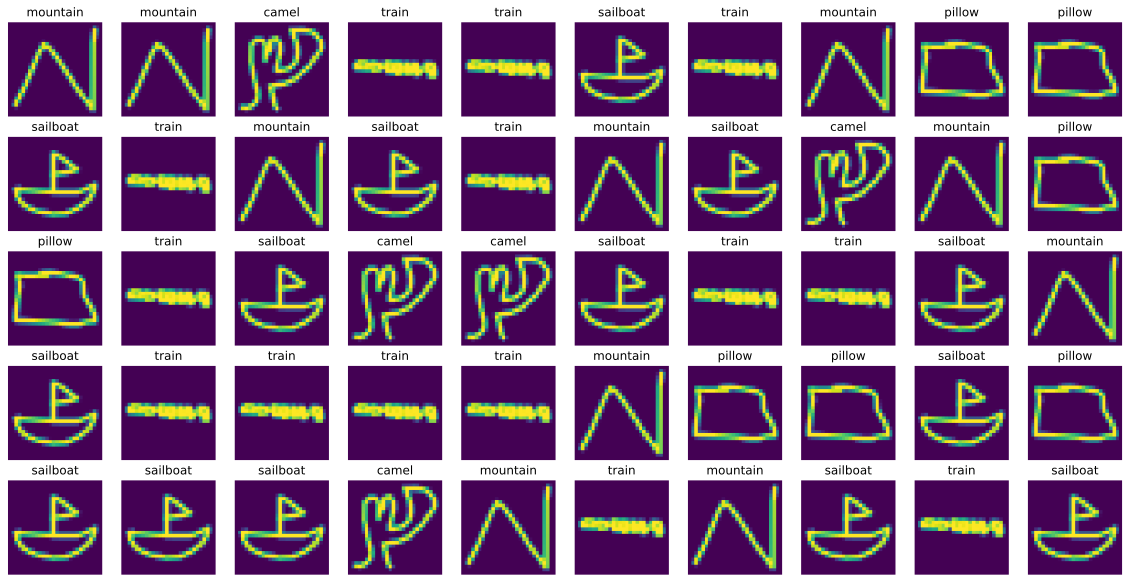

In [ ]:
label_mapping = {
    0: "camel",
    1: "dog",
    2: "duck",
    3: "face",
    4: "horse",
    5: "ice cream",
    6: "microphone",
    7: "monkey",
    8: "moon",
    9: "mosquito",
    10: "mountain",
    11: "moustache",
    12: "mug",
    13: "onion",
    14: "owl",
    15: "panda",
    16: "pillow",
    17: "pizza",
    18: "pond",
    19: "pool",
    20: "potato",
    21: "radio",
    22: "rainbow",
    23: "sailboat",
    24: "snowman",
    25: "sun",
    26: "television",
    27: "The Eiffel Tower",
    28: "toilet",
    29: "train",
}

def view_images_grid(data_loader, label_dict):

    images, labels = next(iter(data_loader))  # Prende un batch dell'immagine e della label
    batch_size = len(images)

    # Transformazione per convertire l'immagine in bianco e nero
    grayscale_transform = transforms.Grayscale()

    fig, axs = plt.subplots(5, 10, figsize=(20, 10))

    for i in range(5):
        for j in range(10):
            r_index = random.randint(0, batch_size - 1)
            image = images[r_index]
            label = labels[r_index].item()

            image_gray = grayscale_transform(image).detach().numpy()

            axs[i, j].imshow(image_gray[0])
            axs[i, j].axis('off')
            axs[i, j].set_title(label_dict[label])

    plt.show()

view_images_grid(train_loader, label_mapping)

# Plot HeatMap delle immagini
 La heatmap viene creata calcolando la media dei valori dei pixel per le immagini che condividono la stessa etichetta.

  La heatmap fornisce una rappresentazione visiva delle regioni rilevanti per ciascuna classe. Questo può aiutare a capire meglio come la rete sta imparando a discriminare le diverse categorie, identificando quali parti delle immagini contribuiscono maggiormente alla classificazione corretta.

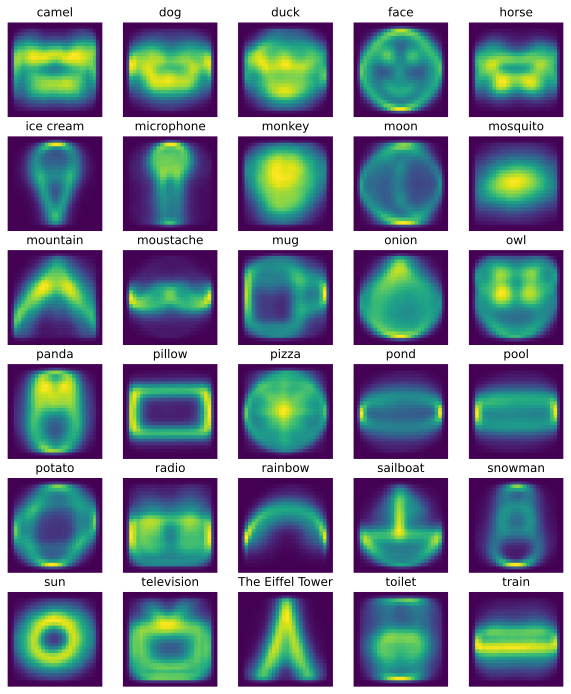

In [14]:
label_mapping = {
    0: "camel",
    1: "dog",
    2: "duck",
    3: "face",
    4: "horse",
    5: "ice cream",
    6: "microphone",
    7: "monkey",
    8: "moon",
    9: "mosquito",
    10: "mountain",
    11: "moustache",
    12: "mug",
    13: "onion",
    14: "owl",
    15: "panda",
    16: "pillow",
    17: "pizza",
    18: "pond",
    19: "pool",
    20: "potato",
    21: "radio",
    22: "rainbow",
    23: "sailboat",
    24: "snowman",
    25: "sun",
    26: "television",
    27: "The Eiffel Tower",
    28: "toilet",
    29: "train",
}

def get_label_heatmap(data_loader, label, label_name):

    # Ottiene le immagini di una determinata categoria
    X_labeled = torch.stack([data[0] for data in data_loader.dataset if data[1] == label])

    # Media dei valori dei pixel
    X_mean = torch.sum(X_labeled, axis=0).squeeze().mean(dim=0)

    return X_mean


num_labels = len(label_mapping)

rows = int((num_labels - 1) / 5) + 1
cols = min(num_labels, 5)

fig, axs = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

for key, value in label_mapping.items():

    heatmap = get_label_heatmap(train_loader, key, value)

    i = key // cols
    j = key % cols

    if rows == 1:
        axs[j].set_title(value)
        axs[j].imshow(heatmap.detach().numpy().reshape(28, 28))
        axs[j].axis('off')
    else:
        axs[i, j].set_title(value)
        axs[i, j].imshow(heatmap.detach().numpy().reshape(28, 28))
        axs[i, j].axis('off')

plt.show()

# Plot numero d'istanze per categoria
Il plot del numero d'istanze per ogni categoria è utile per comprendere se il train set è sbilanciato o meno ovvero se sono presenti più istanze in una categoria rispetto ad un'altra.

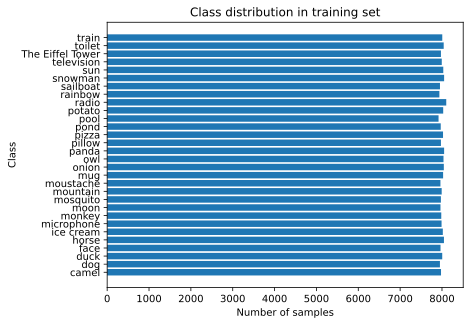

In [ ]:
label_mapping = {
    0: "camel",
    1: "dog",
    2: "duck",
    3: "face",
    4: "horse",
    5: "ice cream",
    6: "microphone",
    7: "monkey",
    8: "moon",
    9: "mosquito",
    10: "mountain",
    11: "moustache",
    12: "mug",
    13: "onion",
    14: "owl",
    15: "panda",
    16: "pillow",
    17: "pizza",
    18: "pond",
    19: "pool",
    20: "potato",
    21: "radio",
    22: "rainbow",
    23: "sailboat",
    24: "snowman",
    25: "sun",
    26: "television",
    27: "The Eiffel Tower",
    28: "toilet",
    29: "train",
}

# Funzione per calcolare e visualizzare la distribuzione delle etichette di classe
def plot_class_distribution(train_loader, label_mapping):
    labels = torch.tensor([], dtype=torch.long)

    for data, target in train_loader:
        labels = torch.cat((labels, target), dim=0)

    labels = labels.long()

    # Calcola la distribuzione delle etichette di classe
    label_counts = labels.bincount()

    classes_name = [label_mapping[i.item()] for i in torch.arange(len(label_counts))]
    counts = [count.item() for count in label_counts if count > 0]

    plt.barh(classes_name, counts)
    plt.title('Class distribution in training set')
    plt.xlabel('Number of samples')
    plt.ylabel('Class')
    plt.show()

plot_class_distribution(train_loader, label_mapping)

# Train a first baseline algorithm as a reference
Come baseline essendo un problema di classificazione ho utilizzato un modello di LogisticRegression di Sklear

In [ ]:
label_mapping = ["camel","dog", "duck", "face", "horse", "ice cream", "microphone", "monkey","moon", "mosquito", "mountain","moustache", "mug", "onion", "owl",
                 "panda","pillow","pizza","pond","pool","potato","radio","rainbow","sailboat","snowman","sun","television","The Eiffel Tower","toilet","train"]

In [ ]:
# Preparazione dei dati per scikit-learn
train_data = torch.cat([data for data, _ in train_loader], dim=0).reshape(train_dataset_size, -1)
train_labels = torch.cat([targets for _, targets in train_loader], dim=0)

test_data = torch.cat([data for data, _ in test_loader], dim=0).reshape(test_dataset_size, -1)
test_labels = torch.cat([targets for _, targets in test_loader], dim=0)

# Modello di Logistic Regression
model = LogisticRegression(solver='lbfgs', n_jobs=-1, multi_class='multinomial')

# Training del modello
model.fit(train_data.detach().numpy(), train_labels.detach().numpy())

# Valutazione del modello con il test set
predicted_labels = model.predict(test_data)

# Calcolo delle metriche di valutazione
accuracy = accuracy_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='macro')

classes_name = ["camel","dog", "duck", "face", "horse", "ice cream", "microphone", "monkey","moon", "mosquito", "mountain","moustache", "mug", "onion", "owl",
                 "panda","pillow","pizza","pond","pool","potato","radio","rainbow","sailboat","snowman","sun","television","The Eiffel Tower","toilet","train"]

print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Classification report for MLP:\n%s\n"
      % (classification_report(test_labels, predicted_labels, target_names=classes_name)))

Accuracy: 0.0345
Recall: 0.0346
F1 Score: 0.0343
Classification report for MLP:
                  precision    recall  f1-score   support

           camel       0.02      0.02      0.02      1075
             dog       0.03      0.03      0.03      1018
            duck       0.03      0.04      0.04       986
            face       0.05      0.05      0.05      1014
           horse       0.04      0.05      0.04       950
       ice cream       0.02      0.02      0.02       973
      microphone       0.04      0.04      0.04       990
          monkey       0.03      0.03      0.03      1008
            moon       0.03      0.03      0.03      1020
        mosquito       0.04      0.04      0.04      1016
        mountain       0.04      0.04      0.04      1027
       moustache       0.03      0.02      0.03      1033
             mug       0.03      0.03      0.03       961
           onion       0.04      0.05      0.05       973
             owl       0.02      0.01      0.01  

# Neural Network
La rete utilizzata per risolvere il problema di classificazione di immagini è ResNet.

La rete è costituita:


*   **Strato d'input**: alla rete gli vengono passate in input immagini RGB (per tale motivo alla costruzione del dataset le immagini sono modificate ad immagini RGB)
*   **Convolutional Layer**: il primo strato della rete è un convoluzione con 64 filtri (Kernel) di dimensione 7x7 con stride 2 e padding di 3 pixel su tutti i lati. Ovvero in questo primo strato vengono applicati 64 filtri alle immagini in input per estrarre le feature
*   **Batch Normalization**: dopo ogni convolutional layer è presente uno strato di batch normalization con 64 canali. Questo strato aiuta a normalizzare le feature per accelerare la convergenza e ridurre il problema del "vanishing gradient" (i gradienti diventano sempre più piccoli durante la backpropagation).
*   **ReLU Activation**: dopo la batch normalization, viene applicata una funzione di attivazione ReLU (Rectified Linear Unit) per introdurre non linearità nel modello
*   **Max Pooling**: dopo la prima serie di convoluzioni e funzioni di attivazione, viene applicato uno strato di max pooling 2D con una finestra di 3x3 e uno stride di 2. Questo strato riduce le dimensioni delle feature e aiuta a creare una rappresentazione più compatta delle informazioni.
*   **BasicBlock**: successivamente nella rete, Layer1, Layer2, Layer3, Layer4, sono caratterizzati da dei blocchi che effettua una convoluzione seguita da batch normalization e ReLU. All'aumentare della profondita della rete aumentano il numero di canali d'ingresso ed il numero di canali d'uscita, infatti nel layer 1 si hanno 64 canali d'ingresso e 64 canali d'uscita nel layer 2 sono 64 canali d'ingresso e 128 d'uscita e procede fino all'ultimo layer dove si hanno 512 canali in ingresso e 512 canali in uscita.
*   **Downsample**: nei BasicBlock dei layer 2 e 4 viene applicato downsampling serve a modificare le dimensioni delle feature map.
*   **Adaptive Average Pooling**: dopo aver effettuato i  BasicBlock viene effettuato Adaptive Average Pooling, ovvero tale operazione permette di adattare dinamicamente la dimensione delle feature map in uscita dai layer convoluzionali, in questo modo si può ottenere una rappresentazione fissa delle feature map indipendentemente dalle dimensioni dell'input originale.
*   **Fully Connected Layer** (fc):Infine, c'è uno strato fully connected con un numero di neuroni in ingresso pari a 512 e un numero di neuroni in uscita pari a 30. Questo strato viene utilizzato per la classificazione e assegna l'input a una delle 30 classi possibili.

NOTA: è stato modificato l'ultimo strato della rete poichè essendo preaddestrata sul dataset ImageNet tale dataset prevede la classificazioni d'immagini suddivise in 1000 categorie mentre per questo dataset le categorie sono 30.

In [ ]:
model = torchvision.models.resnet18(weights='IMAGENET1K_V1').to(device)

# Modifica l'ultimo strato completamente connesso per avere 30 classi di output
model.fc = nn.Linear(512, 30).to(device)


# inizializzazione dell'ottimizzatore SGD
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# definizione della funzione di perdita, CrossEntropyLoss
criterion = torch.nn.CrossEntropyLoss()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
def train(epoch, log_interval=200):
    # Set model to training mode
    model.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        target = target.long()

        output = model(data)

        loss = criterion(output, target)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        running_loss += loss.item()

        if batch_idx % log_interval == 0:
            running_loss = 0.0

            # Generate predictions vs. actuals figure
            inputs, labels = data.cpu(), target.cpu()
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

In [ ]:
def validate(loss_vector, accuracy_vector):
    model.eval()                                               # è come se impostassimo il modello in modalità "valutazione"
    val_loss, correct = 0, 0                                   # ovvero ad esempio disabilita tecniche di regolarizzazione per
    for data, target in val_loader:                            # per non influenzare i dati

        data = data.to(device)
        target = target.to(device)

        target = target.long()

        output = model(data)

        loss = criterion(output, target)
        val_loss += loss.item()

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

    val_loss /= len(val_loader)
    accuracy = 100.0 * correct / len(val_loader.dataset)


    loss_vector.append(val_loss)
    accuracy_vector.append(accuracy)

    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(val_loader.dataset), accuracy))

In [ ]:
%%time
epochs = 10

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

Train Epoch: 1 [0/240000 (0%)]	Loss: 3.870548
Train Epoch: 1 [1000/240000 (0%)]	Loss: 4.400875
Train Epoch: 1 [2000/240000 (1%)]	Loss: 3.274773
Train Epoch: 1 [3000/240000 (1%)]	Loss: 3.374199
Train Epoch: 1 [4000/240000 (2%)]	Loss: 2.692016
Train Epoch: 1 [5000/240000 (2%)]	Loss: 2.983237
Train Epoch: 1 [6000/240000 (2%)]	Loss: 3.171399
Train Epoch: 1 [7000/240000 (3%)]	Loss: 3.150330
Train Epoch: 1 [8000/240000 (3%)]	Loss: 3.211930
Train Epoch: 1 [9000/240000 (4%)]	Loss: 2.654527
Train Epoch: 1 [10000/240000 (4%)]	Loss: 2.831018
Train Epoch: 1 [11000/240000 (5%)]	Loss: 2.798749
Train Epoch: 1 [12000/240000 (5%)]	Loss: 4.145421
Train Epoch: 1 [13000/240000 (5%)]	Loss: 1.873417
Train Epoch: 1 [14000/240000 (6%)]	Loss: 2.150667
Train Epoch: 1 [15000/240000 (6%)]	Loss: 3.888465
Train Epoch: 1 [16000/240000 (7%)]	Loss: 2.727280
Train Epoch: 1 [17000/240000 (7%)]	Loss: 2.661263
Train Epoch: 1 [18000/240000 (8%)]	Loss: 3.322076
Train Epoch: 1 [19000/240000 (8%)]	Loss: 1.619737
Train Epoch: 

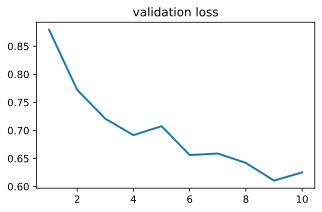

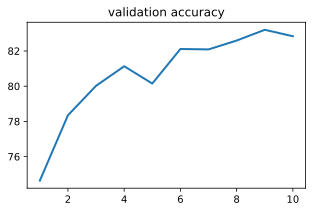

In [ ]:
# Grafici per visualizzare il miglioramento dell'accuracy
# e della Loss durante il training
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');

In [ ]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix, classification_report
classes_name = ["camel",
              "dog",
              "duck",
              "face",
              "horse",
              "ice creamy",
              "microphone",
              "monkey",
              "moon",
              "mosquito",
              "mountain",
              "moustache",
              "mug",
              "onion",
              "panda",
              "owl",
              "pillow",
              "pizza",
              "pond",
              "pool",
              "potato",
              "radio",
              "rainbow",
              "sailboat",
              "snowman",
              "sun",
              "television",
              "The Eiffel Tower",
              "toilet",
              "train"]

def test():
    model.eval()
    correct = 0
    predicted_labels = []
    true_labels = []

    for data, target in test_loader:
        data = data.to(device)
        target = target.to(device)

        target = target.long()

        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        predicted_labels.extend(pred.cpu().numpy())
        true_labels.extend(target.cpu().numpy())

    accuracy = 100.0 * correct / len(test_loader.dataset)
    print('\nTest set: Accuracy: {}/{} ({:.2f}%)\n'.format(
        correct, len(test_loader.dataset), accuracy))

    return predicted_labels, true_labels

predicted_labels, true_labels = test()

predicted_labels = np.array(predicted_labels).flatten()
true_labels = np.array(true_labels).flatten()

# calolo della confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Print del classification report
print("Classification report for MLP:\n%s\n"
      % (classification_report(true_labels, predicted_labels, target_names=classes_name)))


Test set: Accuracy: 25075/30000 (83.58%)

Classification report for MLP:
                  precision    recall  f1-score   support

           camel       0.82      0.90      0.86      1048
             dog       0.61      0.44      0.51       926
            duck       0.84      0.82      0.83       980
            face       0.90      0.77      0.83       944
           horse       0.60      0.93      0.73       979
      ice creamy       0.97      0.91      0.94       999
      microphone       0.88      0.89      0.88       995
          monkey       0.74      0.68      0.71       997
            moon       0.88      0.76      0.82       991
        mosquito       0.77      0.74      0.75      1035
        mountain       0.92      0.92      0.92       994
       moustache       0.94      0.81      0.87      1022
             mug       0.97      0.91      0.94      1025
           onion       0.80      0.88      0.84       988
           panda       0.87      0.71      0.78       9

# 2 Neural Network
Anche in questo caso la rete utilizzata è ResNet18 preaddestrata sul dataset ImageNet, ciò che cambia rispetto alla prima che in questo caso viene effettuata una esplorazione randomica su i valori degli iperparametri dell'ottimizzatore in particolare sul learning rate e sul weight_decay

In [9]:
def train_model(model, optimizer, criterion, epochs):

    loss_vector = []
    accuracy_vector = []

    for epoch in range(1, epochs + 1):

        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data = data.to(device)
            target = target.to(device)
            target = target.long()

            output = model(data)
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if batch_idx % 6000 == 0:
              print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                  epoch, batch_idx * len(data), len(train_loader.dataset),
                  100. * batch_idx / len(train_loader), loss.data.item()))

        model.eval()
        val_loss, correct = 0, 0
        for data, target in val_loader:

            data = data.to(device)
            target = target.to(device)
            target = target.long()

            output = model(data)

            loss = criterion(output, target)
            val_loss += loss.item()

            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

        val_loss /= len(val_loader)
        accuracy = 100.0 * correct / len(val_loader.dataset)

        loss_vector.append(val_loss)
        accuracy_vector.append(accuracy)
    return loss_vector, accuracy_vector, model

In [10]:
# Definizione degli iperparametri
hyperparameters = {
    "lr": [0.0001, 0.001, 0.01, 0.1],
    "weight_decay":[0, 1e-5, 1e-8]
}

Random Search 1/10: Training ResNet with lr=0.1 and weight_decay=1e-08
Train Epoch: 1 [0/240000 (0%)]	Loss: 4.233006
Train Epoch: 1 [30000/240000 (12%)]	Loss: 3.308852
Train Epoch: 1 [60000/240000 (25%)]	Loss: 3.561240
Train Epoch: 1 [90000/240000 (38%)]	Loss: 3.328173
Train Epoch: 1 [120000/240000 (50%)]	Loss: 3.710234
Train Epoch: 1 [150000/240000 (62%)]	Loss: 3.639076
Train Epoch: 1 [180000/240000 (75%)]	Loss: 3.460963
Train Epoch: 1 [210000/240000 (88%)]	Loss: 3.454222
Train Epoch: 2 [0/240000 (0%)]	Loss: 3.597267
Train Epoch: 2 [30000/240000 (12%)]	Loss: 3.474873
Train Epoch: 2 [60000/240000 (25%)]	Loss: 3.503507
Train Epoch: 2 [90000/240000 (38%)]	Loss: 3.534593
Train Epoch: 2 [120000/240000 (50%)]	Loss: 3.251654
Train Epoch: 2 [150000/240000 (62%)]	Loss: 3.463033
Train Epoch: 2 [180000/240000 (75%)]	Loss: 3.672177
Train Epoch: 2 [210000/240000 (88%)]	Loss: 3.374115
Train Epoch: 3 [0/240000 (0%)]	Loss: 3.428460
Train Epoch: 3 [30000/240000 (12%)]	Loss: 3.431376
Train Epoch: 3 [60

Text(0.5, 1.0, 'validation accuracy')

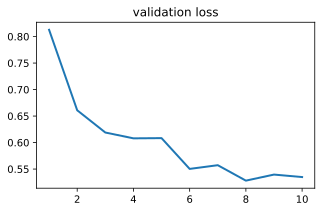

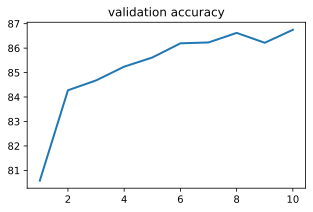

In [12]:
import random
best_accuracy = 0
best_hyperparameters = None


# Random search for hyperparameters
num_random_search = 10
for i in range(num_random_search):
    lr = random.choice(hyperparameters["lr"])
    weight_decay = random.choice(hyperparameters["weight_decay"])
    loss_vector = []
    accuracy_vector = []


    print(f"Random Search {i+1}/{num_random_search}: Training ResNet with lr={lr} and weight_decay={weight_decay}")

    epochs = 3

    model = torchvision.models.resnet18(weights='IMAGENET1K_V1').to(device)
    model.fc = nn.Linear(512, 30).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss()

    loss_vector, accuracy_vector, model = train_model(model, optimizer, criterion, epochs)
    val_accuracy = sum(accuracy_vector) / len(accuracy_vector)

    print(f"Random Search {i+1}: Average validation accuracy={val_accuracy:.2f}%")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparameters = {"lr": lr, "weight_decay": weight_decay}

print("Random search finished.")
print(f"Best hyperparameters: {best_hyperparameters}")
print(f"Best validation accuracy: {best_accuracy:.2f}%")

# Train del modello finale con i migliori valori degli iperparametri
best_lr = best_hyperparameters["lr"]
best_weight_decay = best_hyperparameters["weight_decay"]

final_model = torchvision.models.resnet18(weights='IMAGENET1K_V1').to(device)
final_model.fc = nn.Linear(512, 30).to(device)
optimizer = optim.Adam(final_model.parameters(), lr=best_lr, weight_decay=best_weight_decay)
criterion = nn.CrossEntropyLoss()

epochs = 10
loss_vector, accuracy_vector, model = train_model(final_model, optimizer, criterion, epochs)

# Grafici per visualizzare il miglioramento dell'accuracy
# e della Loss durante il training
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), loss_vector)
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accuracy_vector)
plt.title('validation accuracy')

In [15]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix, classification_report
classes_name = ["camel",
              "dog",
              "duck",
              "face",
              "horse",
              "ice creamy",
              "microphone",
              "monkey",
              "moon",
              "mosquito",
              "mountain",
              "moustache",
              "mug",
              "onion",
              "panda",
              "owl",
              "pillow",
              "pizza",
              "pond",
              "pool",
              "potato",
              "radio",
              "rainbow",
              "sailboat",
              "snowman",
              "sun",
              "television",
              "The Eiffel Tower",
              "toilet",
              "train"]

def test():
    final_model.eval()
    correct = 0
    predicted_labels = []
    true_labels = []

    for data, target in test_loader:
        data = data.to(device)
        target = target.to(device)

        target = target.long()

        output = final_model(data)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        predicted_labels.extend(pred.cpu().numpy())
        true_labels.extend(target.cpu().numpy())

    accuracy = 100.0 * correct / len(test_loader.dataset)
    print('\nTest set: Accuracy: {}/{} ({:.2f}%)\n'.format(
        correct, len(test_loader.dataset), accuracy))

    return predicted_labels, true_labels

predicted_labels, true_labels = test()

predicted_labels = np.array(predicted_labels).flatten()
true_labels = np.array(true_labels).flatten()

# calolo della confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Print del classification report
print("Classification report for MLP:\n%s\n"
      % (classification_report(true_labels, predicted_labels, target_names=classes_name)))


Test set: Accuracy: 25948/30000 (86.49%)

Classification report for MLP:
                  precision    recall  f1-score   support

           camel       0.96      0.89      0.92      1027
             dog       0.72      0.67      0.69       990
            duck       0.81      0.90      0.85       996
            face       0.87      0.87      0.87      1020
           horse       0.84      0.80      0.82       996
      ice creamy       0.98      0.92      0.95       974
      microphone       0.90      0.92      0.91       932
          monkey       0.74      0.79      0.77      1019
            moon       0.87      0.81      0.84      1013
        mosquito       0.73      0.81      0.77       975
        mountain       0.94      0.93      0.93      1019
       moustache       0.92      0.85      0.88      1011
             mug       0.94      0.93      0.94       972
           onion       0.89      0.86      0.88       950
           panda       0.85      0.79      0.82      10

# Failure Analysis
La valutazione del modello ResNet18, dopo aver effettuato il train, ha prodotto un'accuracy del 86.49%. Tuttavia, la precisione del modello può essere migliorata.\
Un primo metodo è aggiungere più campioni per ogni categoria, ciò consentirebbe alla rete di avere più immagini con cui esercitarsi e affinare le sue capacità di classificazione.   
Un altro metodo è effettuare una esplorazione dei valori degli iperparamentri più dettagliata, aggiugendo un range di valori per il learning rate e weight_decay più ampio. \
Analizzando il classification report, ho notato che alcune categorie hanno ottenuto un'accuracy notevolmente più alta rispetto ad altre. Le categorie con l'accuracy maggiore sono: ice cream (0.98), camel (0.96), sun (0.96) e la Eiffel tower (0.96). D'altra parte, le categorie con un'accuracy più bassa sono: dog (0.72), mosquito (0.72) e potato (0.73). \
Un fattore che potrebbe aver influenzato le prestazioni del modello è il fatto che la rete è stata readdestrata sul dataset ImageNet. Di conseguenza, le categorie presenti sia nel dataset di addestramento che nel dataset di test hanno ottenuto risultati migliori. \
Analizzando il plot delle heatmap si può notare come categorie che hanno avuto plot più definiti e dettagliati rispetto ad altre sono stati meglio predetti. Ciò suggerisce che la rete è stata in grado di estrarre caratteristiche più discriminative da queste categorie, contribuendo alla loro migliore predizione.            